# Métodos de Euler, Euler implícito y Heun
#### https://meet.noysi.com/metodosnumericos2

En esta práctica implementaremos y compararemos estos tres métodos. 

Vamos a considerar el siguiente problema de valor inicial:

Aproximar el valor en $t=1$ de la solución del PVI $$x'=t(x^2-x),\quad x(-1)=0,5.$$ 

In [79]:
f(t,x) = t*x*(x-1)

In [80]:
var('c')
u(t) = 1/(exp(t^2/2+c)+1)

In [81]:
solve(0.5 == u(-1),c)

[c == (-1/2)]

In [5]:
v(t) = 1/(exp(t^2/2-1/2)+1)
(v.diff()(t)-f(t,v(t))).simplify_full()

0

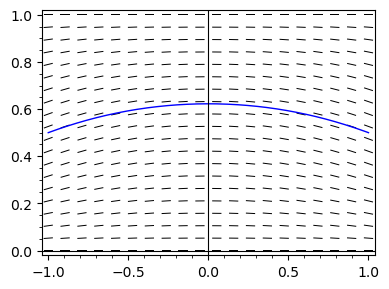

In [8]:
gs = plot(v(t),-1,1) + plot_slope_field(f(t,x),(t,-1,1),(x,0,1))
(gs).show(figsize=4)

1. Implementar el método de Euler y aplicarlo al PVI ejemplo 1 con $5$ pasos. 

a) Representa los resultados junto con la solución exacta y el campo de pendientes. 

b) Aplica también el método con $10$, $20$ y $50$ pasos y representa en una gráfica las aproximaciones obtenidas y la solución exacta.

In [24]:
# Euler con 1 paso
# Valores iniciales, finales ynúmero de pasos
a = -1
x0 = 0.5
b = 1
n = 1
# Fórmulas iniciales del método
h = (b-a)/n
t0 = a

In [25]:
t1 = t0 + h
x1 = x0 + h*f(t0,x0)
t1,x1

(1, 1.00000000000000)

In [21]:
e1 = [(t0,x0),(t1,x1)]

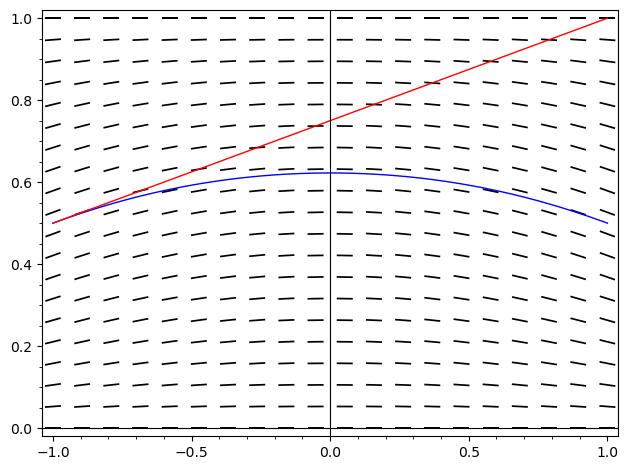

In [22]:
gs + line(e1, color='red')

In [26]:
# Euler con 5 pasos
# Valores iniciales, finales ynúmero de pasos
a = -1
x0 = 0.5
b = 1
n = 5
# Fórmulas iniciales del método
h = (b-a)/n
t0 = a

In [42]:
tk = [t0]*(n+1)
xk = [x0]*(n+1)
for i in [1 .. n]:
    tk[i] = t0 + i*h
    xk[i] = xk[i-1] + h*f(tk[i-1],xk[i-1])
e5 = list(zip(tk,xk))
e5

[(-1, 0.500000000000000),
 (-3/5, 0.600000000000000),
 (-1/5, 0.657600000000000),
 (1/5, 0.675612979200000),
 (3/5, 0.658080172677080),
 (1, 0.604077614515548)]

In [43]:
tk = [t0, t0+h .. b]
xk = [x0]*(n+1)
for i in [1 .. n]:
    xk[i] = xk[i-1] + h*f(tk[i-1],xk[i-1])
e5 = list(zip(tk,xk))
e5

[(-1, 0.500000000000000),
 (-3/5, 0.600000000000000),
 (-1/5, 0.657600000000000),
 (1/5, 0.675612979200000),
 (3/5, 0.658080172677080),
 (1, 0.604077614515548)]

In [54]:
def euler(f,a,x0,b,n):
    # Método de Euler
    # Recibe la función f, ....
    # Calcula la solución aprox de x'=f(t,x) mediante el método de Euler de n pasos
    # Devuelve una lista con los puntos (tk,xk) obtenidos
    h = (b-a)/n
    tk = [a.n(), a+h .. b]
    xk = [x0]*(n+1)
    for i in [1 .. n]:
        xk[i] = xk[i-1] + h*f(tk[i-1],xk[i-1])
    e5 = list(zip(tk,xk))
    return e5

In [ ]:
# Valores iniciales, finales y número de pasos
f(t,x) = t*x*(x-1)
a = -1
x0 = 0.5
b = 1
n = 5

In [53]:
euler(f,a,x0,b,50)

[(-1.00000000000000, 0.500000000000000),
 (-0.960000000000000, 0.510000000000000),
 (-0.920000000000000, 0.519596160000000),
 (-0.880000000000000, 0.528782028450888),
 (-0.840000000000000, 0.537552868589194),
 (-0.800000000000000, 0.545905485266434),
 (-0.760000000000000, 0.553838051231953),
 (-0.720000000000000, 0.561349935744835),
 (-0.680000000000000, 0.568441537883897),
 (-0.640000000000000, 0.575114126444162),
 (-0.600000000000000, 0.581369687865181),
 (-0.560000000000000, 0.587210783238702),
 (-0.520000000000000, 0.592640415094728),
 (-0.480000000000000, 0.597661904367343),
 (-0.440000000000000, 0.602278777694101),
 (-0.399999999999999, 0.606494665002849),
 (-0.359999999999999, 0.610313207184064),
 (-0.319999999999999, 0.613737973531083),
 (-0.279999999999999, 0.616772388550309),
 (-0.239999999999999, 0.619419667694159),
 (-0.199999999999999, 0.621682761546650),
 (-0.159999999999999, 0.623564307990989),
 (-0.119999999999999, 0.625066591906449),
 (-0.0799999999999992, 0.6261915119

2. Implementar el método de Euler implícito y el método de Heun y aplicarlo al PVI ejemplo con $5$, $10$, $20$ y $50$ pasos. Representar en una gráfica las aproximaciones obtenidas y la solución exacta. Para implementar el método de Euler implícito, crea antes una función que aplique el método del punto fijo. 

In [72]:
# Valores iniciales, finales y número de pasos
f(t,x) = t*x*(x-1)
a = -1
x0 = 0.5
b = -0.5
n = 1

In [73]:
h = (b-a)/n

In [77]:
# x1 es la solución de x1 = x0 + h*f(t0+h,x1)
F(x) = x0 + h*f(t0+h,x)
y0 = x0 
y1 = F(y0)
y2 = F(y1)
y3 = F(y2)
y3,F(y3)

(0.561553716659546, 0.561552784991349)

In [78]:
F(F(F(x0)))

0.561553716659546

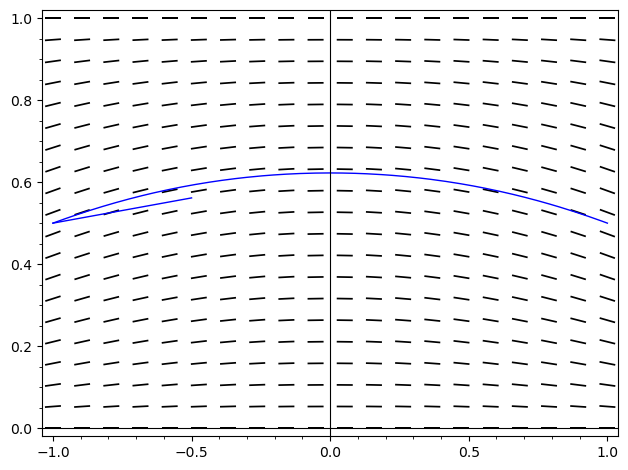

In [75]:
t1 = a + h
x1 = y3
line([(t0,x0),(t1,x1)]) + gs

In [82]:
def heun(f,a,x0,b,n):
    # Método de Heun
    # Recibe la función f, ....
    # Calcula la solución aprox de x'=f(t,x) mediante el método de Heun de n pasos
    # Devuelve una lista con los puntos (tk,xk) obtenidos
    h = (b-a)/n
    tk = [a.n(), a+h .. b]
    xk = [x0]*(n+1)
    for i in [1 .. n]:
        xk[i] = xk[i-1] + h*( f( tk[i-1], xk[i-1] ) 
                            + f(  tk[i] , xk[i-1] + h*f(tk[i-1],xk[i-1])) )/2
    e5 = list(zip(tk,xk))
    return e5

In [84]:
# Valores iniciales, finales y número de pasos
f(t,x) = t*x*(x-1)
a = -1
x0 = 0.5
b = 1
n = 5
heun(f,a,x0,b,n)

[(-1.00000000000000, 0.500000000000000),
 (-0.600000000000000, 0.578800000000000),
 (-0.200000000000000, 0.617300708673560),
 (0.200000000000000, 0.617492347502226),
 (0.600000000000000, 0.579211082767329),
 (1.00000000000000, 0.500049848545003)]

In [85]:
def punto_fijo(F,x0,n):
    y0 = copy(x0)
    for _ in range(n):
        y0 = F(y0)
    return y0

In [102]:
def euler_implicito(f,a,x0,b,n):
    # Método de Euler implícito
    # Recibe la función f, ....
    # Calcula la solución aprox de x'=f(t,x) mediante el método de Euler imp. de n pasos
    # Devuelve una lista con los puntos (tk,xk) obtenidos
    h = (b-a)/n
    tk = [a.n(), a+h .. b]
    xk = [x0]*(n+1)
    for i in [1 .. n]:
        F(x) = xk[i-1] + h*f(tk[i],x)
        xk[i] = punto_fijo(F,xk[-1],3)
    e5 = list(zip(tk,xk))
    return e5

In [103]:
euler_implicito(f,a,x0,b,n)

[(-1.00000000000000, 0.500000000000000),
 (-0.600000000000000, 0.559160704040960),
 (-0.200000000000000, 0.578665720061641),
 (0.200000000000000, 0.558943643883698),
 (0.600000000000000, 0.498943911561099),
 (1.00000000000000, 0.402705273540118)]

In [104]:
def euler_implicito(f,a,x0,b,n):
    # Método de Euler implícito
    # Recibe la función f, ....
    # Calcula la solución aprox de x'=f(t,x) mediante el método de Euler imp. de n pasos
    # Devuelve una lista con los puntos (tk,xk) obtenidos
    h = (b-a)/n
    tk = [a.n(), a+h .. b]
    xk = [x0]*(n+1)
    for i in [1 .. n]:
        xk[i] = xk[-1]
        xk[i] = xk[i-1] + h*f(tk[i],xk[i])
        xk[i] = xk[i-1] + h*f(tk[i],xk[i])
        xk[i] = xk[i-1] + h*f(tk[i],xk[i])
    e5 = list(zip(tk,xk))
    return e5

In [105]:
euler_implicito(f,a,x0,b,n)

[(-1.00000000000000, 0.500000000000000),
 (-0.600000000000000, 0.559160704040960),
 (-0.200000000000000, 0.578665720061641),
 (0.200000000000000, 0.558943643883698),
 (0.600000000000000, 0.498943911561099),
 (1.00000000000000, 0.402705273540118)]

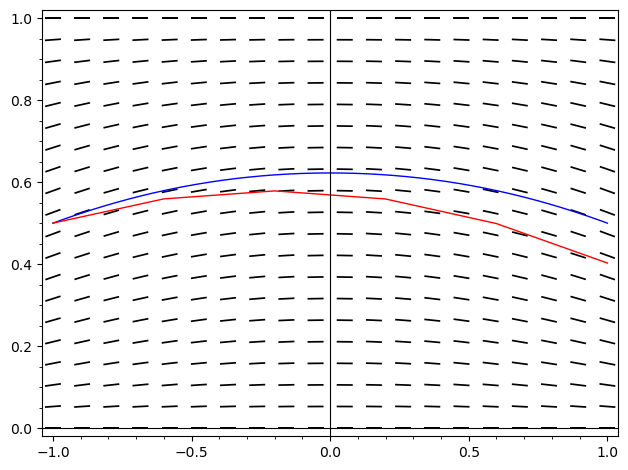

In [101]:
# Valores iniciales, finales y número de pasos
f(t,x) = t*x*(x-1)
a = -1
x0 = 0.5
b = 1
n = 5
ei5 = euler_implicito(f,a,x0,b,n)
gs + line(ei5, color='red')

3. Consideremos el PVI $x'=x$, $x(0)=1$. 

a) Aplica los métodos anteriores y representa, en una gráfica para cada método, los errores cometidos al aproximar con cada número de pasos entre 10 y 100 pasos. En el eje $x$ representa $h$ y en el $y$ el error obtenido a partir de la diferencia (en valor absoluto) con la solución exacta. Representa los errores en escala normal y en escala logarítmica en el eje y. 

b) Representa en otra gráfica los errores locales de truncamiento. 